# CUSTOMER CHURN PREDICTION

### INTRODCTION

Customer churn, is the rate at which customers stop doing business with an entity. It is most commonly expressed as the percentage of service subscribers who discontinue their subscriptions within a given time period. It is also the rate at which employees leave their jobs within a certain period. For a company to expand its clientele, its growth rate (measured by the number of new customers) must exceed its churn rate.

Customer churn affects businesses and businesses go great lenghts in order to avoid losing customers as it is cheaper to maintain existing customer thn to acquire new ones. In this notebook I will be looking at the churn rate  for an internet service provider. A model will be built in order to predict chustomer churn so as eneable the company tackle customer churn more effectively



### LOADING IN THE NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [3]:
filepath = r'C:\Users\Gbolahan\Desktop\Samuel file\JUPYTER WORKS\New folder\churn.csv'
data = pd.read_csv(filepath)

In [36]:
data.head(10)

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1
5,56,1,1,11.94,32,1.38,0,69.4,4.0,0,0
6,71,0,0,8.96,18,0.00,0,21.3,2.0,0,1
7,84,0,0,5.48,14,NaN,1,0.0,0.0,0,1
8,94,0,0,8.54,0,NaN,0,0.0,0.0,0,1
9,112,0,0,8.33,0,NaN,0,0.0,0.0,0,1


### OVERVIEW OF THE DATA AND DATA CLEANING

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


In [30]:
data.nunique()

id                             72274
is_tv_subscriber                   2
is_movie_package_subscriber        2
subscription_age                1110
bill_avg                         179
reamining_contract               247
service_failure_count             19
download_avg                    2856
upload_avg                       802
download_over_limit                8
churn                              2
dtype: int64

In [31]:
data['download_over_limit'].value_counts()

0    68373
1      766
6      688
2      560
7      504
3      498
4      456
5      429
Name: download_over_limit, dtype: int64

In [32]:
data['churn'].value_counts()

1    40050
0    32224
Name: churn, dtype: int64

In [33]:
data.isnull().sum()

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

In [34]:
data['reamining_contract'].isnull()

0        False
1         True
2        False
3         True
4         True
         ...  
72269    False
72270    False
72271    False
72272    False
72273    False
Name: reamining_contract, Length: 72274, dtype: bool

In [90]:
data['reamining_contract'].replace(np.nan, 0, inplace = True)

In [91]:
data.dropna(subset=['download_avg'], axis=0, inplace=True)
data.dropna(subset=["upload_avg"], axis=0, inplace=True)

In [93]:
data.isnull().sum()

id                             0
is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64

In [96]:
data.to_csv(r'C:\Users\Gbolahan\Desktop\Samuel file\JUPYTER WORKS\New folder\churn.csv')

# EXPLORATORY DATA ANALYIS

In [112]:
data.reamining_contract.value_counts()

0.00    37881
0.01      469
1.84      348
1.82      338
0.02      331
        ...  
2.21        1
2.11        1
2.63        1
2.79        1
2.31        1
Name: reamining_contract, Length: 247, dtype: int64

#### Movie package subscribers has lower churn rate than TV subscribers

In [83]:

data.groupby(['is_tv_subscriber', 'is_movie_package_subscriber'])[['churn']].agg(['sum'])                                                            

churn
                                                sum
is_tv_subscriber is_movie_package_subscriber       
0                0                            11964
                 1                                2
1                0                            19891
                 1                             8193

#### The amount of churn with respect to service failure

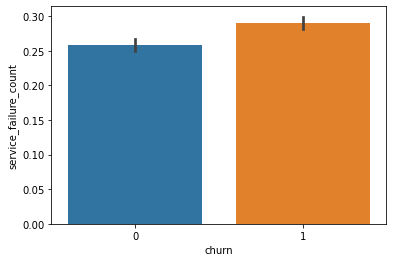

In [25]:
sns.barplot(x="churn",y="service_failure_count",data=data)
plt.show() 

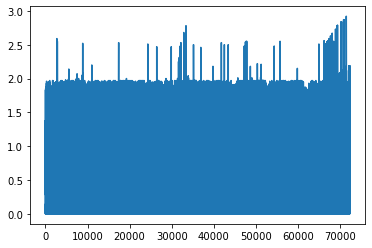

In [116]:
dl = data['reamining_contract']
sns.lineplot( data = dl)

#### visualizing churn and no churn nunbers

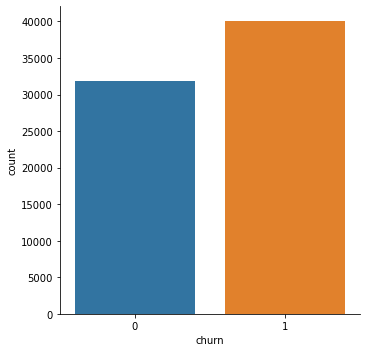

In [48]:
sns.catplot(x='churn', data=df, kind='count')

#### The effect of TV and movie subscription on churn. There is a high churn rate for those with TV subscription and also for those without a movie subscription

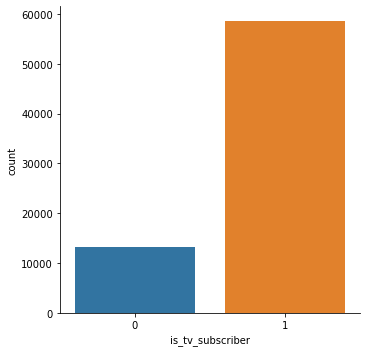

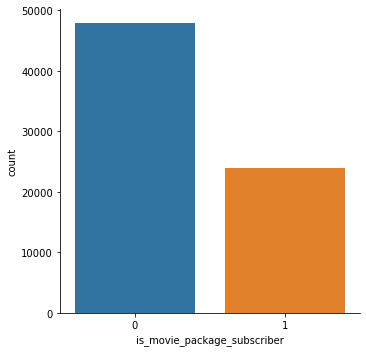

In [89]:
sns.catplot(x='is_tv_subscriber', data=data, kind='count')
sns.catplot(x='is_movie_package_subscriber', data=data, kind='count')

#### billling average has no noticeable effect on churn as the billing average is equally distributed aming churn and no churn

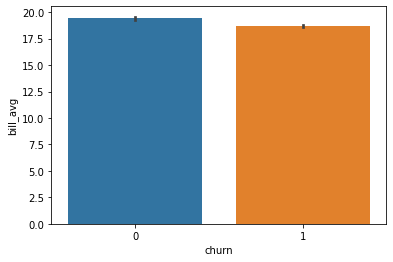

In [77]:
sns.barplot(x="churn",y="bill_avg",data=data)

#### customers with remaining contracts are les likely to churn

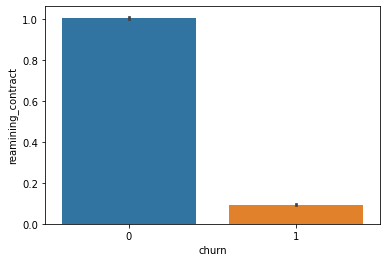

In [79]:
sns.barplot(x="churn",y="reamining_contract",data=data)

#### Download average and churn, customers with high download average seem to have a higher level of churn

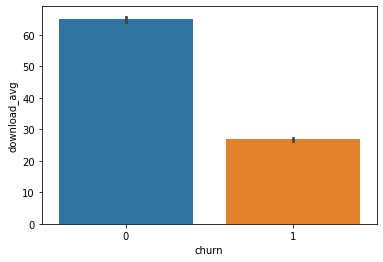

In [28]:
sns.barplot(x="churn",y="download_avg",data=data)
plt.show()

In [71]:
data.columns

Index(['id', 'is_tv_subscriber', 'is_movie_package_subscriber',
       'subscription_age', 'bill_avg', 'reamining_contract',
       'service_failure_count', 'download_avg', 'upload_avg',
       'download_over_limit', 'churn'],
      dtype='object')

#### The billing average for customers with repect to churn. 

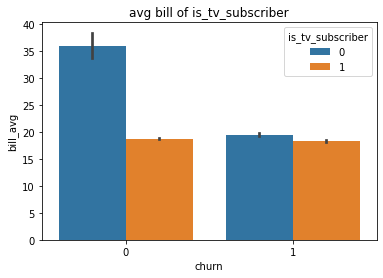

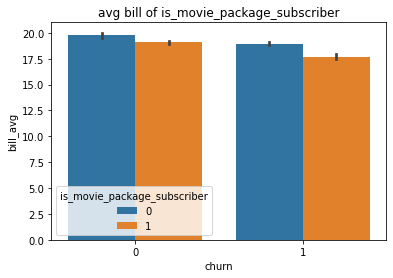

In [88]:
subscribers=["is_tv_subscriber","is_movie_package_subscriber"]
for i in subscribers:
    sns.barplot(x="churn",y="bill_avg",data=data,hue=i)
    plt.title("avg bill of "+ i)
    plt.show()

#### Distribution of numerical varaibles

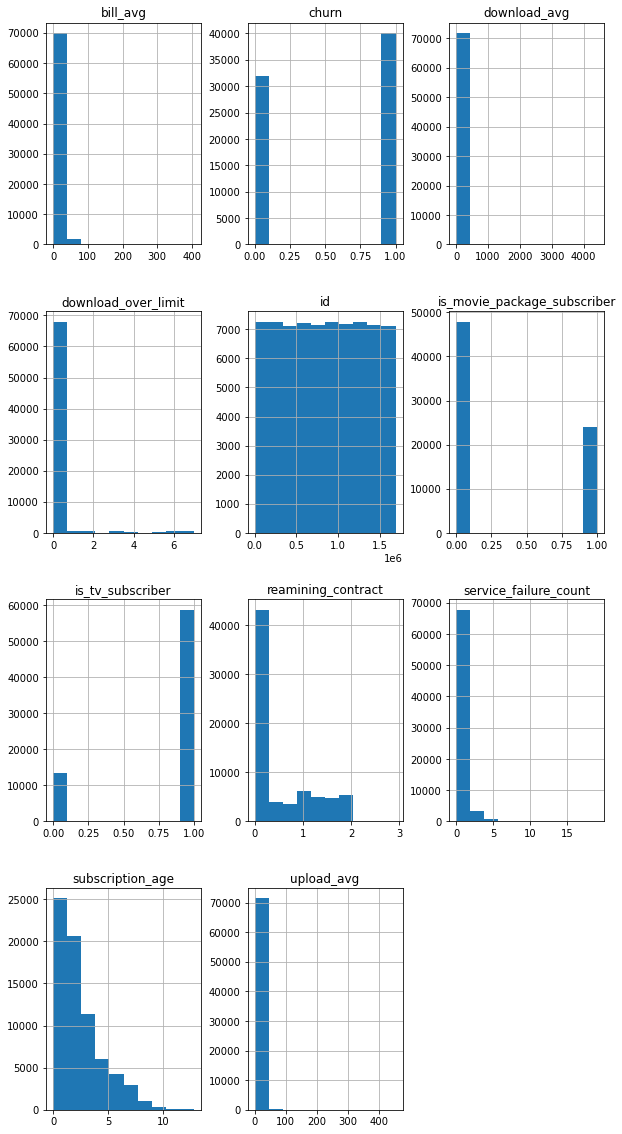

In [51]:
data.hist(figsize=(10,20))
plt.show()

In [84]:
# sns.boxplot(x="subscription_age", y="churn", data=data)

Text(0.5, 1.0, 'Subcrition')

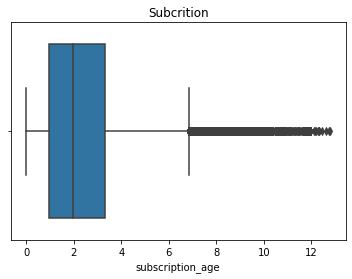

In [49]:
sns.boxplot(df['subscription_age']).set_title('Subcrition')

Text(0.5, 1.0, 'Subcrition')

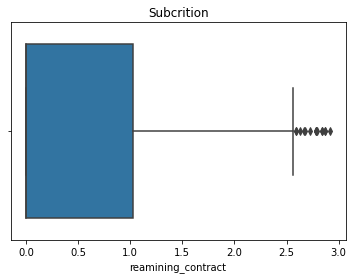

In [52]:
sns.boxplot(df['reamining_contract']).set_title('Subcrition')


#### correlation of variables in the dataset

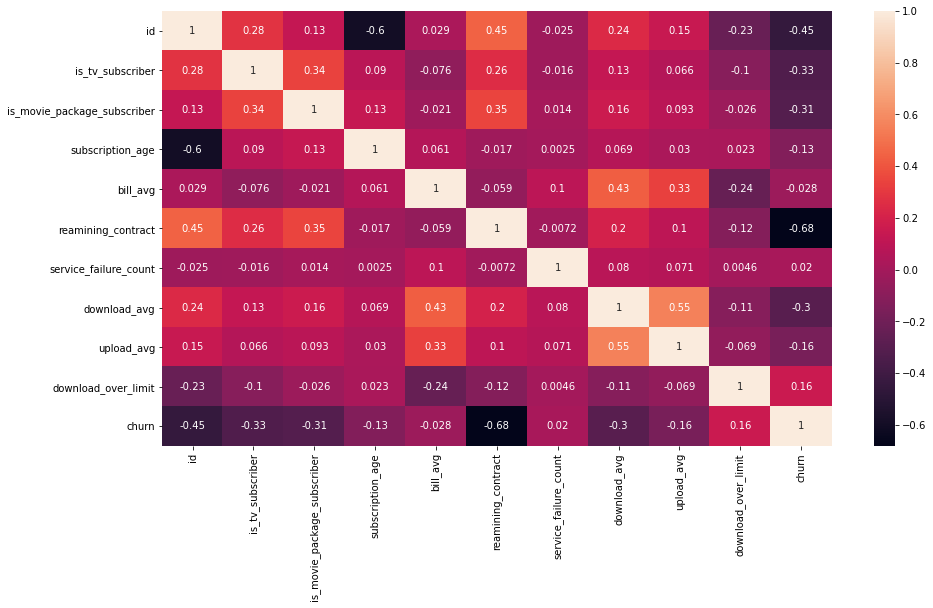

In [57]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

# MODELLING AND PREDICTION

In [4]:
X = data.drop(columns=['churn','id'])
y =data['churn'].values

In [5]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler().fit(X)
X= scale.transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 1)

### LOGISTIC REGRESSION

In [31]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(random_state = 1)
lm.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
predictions = lm.predict(X_train)
accuracy_score(y_train, predictions)

0.8990362642821659

In [32]:
predictions2 = lm.predict(X_test)
accuracy_score(y_test, predictions2)

0.9018916913946587

In [20]:
# scores = cross_val_score(lm,X,y,cv=3)
# np.mean(scores)

cv_scores = cross_val_score(lm, X, y, scoring='accuracy')
average_score = cv_scores.mean().round(3)

print(f'Logitic regresion cross validation score: {average_score*100}%')

Decision Tree Classifier Baseline Score: 84.89999999999999%


In [18]:
from pprint import pprint as pp
from sklearn.metrics import classification_report
s = classification_report(y_test, predictions2)
pp(s)

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.89      0.82      0.85      9534\n'
 '           1       0.87      0.92      0.89     12034\n'
 '\n'
 '    accuracy                           0.88     21568\n'
 '   macro avg       0.88      0.87      0.87     21568\n'
 'weighted avg       0.88      0.88      0.88     21568\n')


In [71]:

confusion_matrix(y_test, predictions2)

array([[ 8677,   857],
       [ 1255, 10779]], dtype=int64)

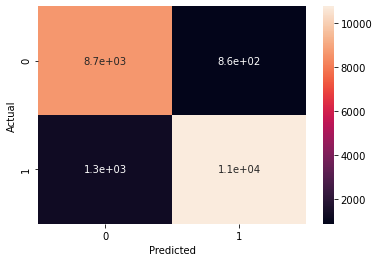

In [79]:
confusion_matrix(y_test, predictions2)
confusion_matrix = pd.crosstab(y_test, predictions2, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

### DECISION TREE

In [40]:
dt_model = DecisionTreeClassifier(random_state = 1)
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)

print(f"Decision Tree accuracy is :{accuracy_dt} ")

Decision Tree accuracy is :0.9698163946587537 


In [35]:
scores2 = cross_val_score(dt_model, X, y,scoring='accuracy')

# average_score2 = scores2.mean().round(3)
average_score2 = scores2.mean().round(3)

print(f'Decision Tree Classifier Baseline Score: {average_score2*100}%'\n/)

Decision Tree Classifier Baseline Score: 40.300000000000004%


In [46]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      9534
           1       0.93      0.92      0.92     12034

    accuracy                           0.91     21568
   macro avg       0.91      0.91      0.91     21568
weighted avg       0.91      0.91      0.91     21568



### RANDOM FOREST

In [24]:
from sklearn import metrics

model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.9384736646884273


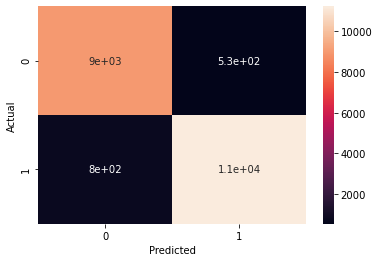

In [39]:
confusion_matrix(y_test, predictions2)
confusion_matrix = pd.crosstab(y_test, prediction_test, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

### SUPPORT VECTOR MACHINES

In [8]:
from sklearn.svm import SVC

svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.9285515578635015


In [43]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      9534
           1       0.91      0.93      0.92     12034

    accuracy                           0.91     21568
   macro avg       0.91      0.91      0.91     21568
weighted avg       0.91      0.91      0.91     21568



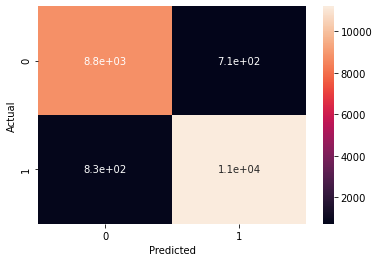

In [9]:
confusion_matrix(y_test, predict_y)
confusion_matrix = pd.crosstab(y_test, predict_y, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

Decision treees has hown to have the best accuracy so far although the work displayed in this notebook will no doubt be improved upon, random forest also displays fairly high accuracy, it does a good job at identifying most of the positive cases (churn) and therefore is a good model. 